In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv('Calendar.csv', parse_dates=['date'])
df['year'] = [d.year for d in df['date']]
df = df[df['year'] == 2017]

df['month'] = [d.month for d in df['date']]
month_label = ["Jan", "Feb", "Mar", "Apr", "May",
               "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['monthf'] = df['month'].replace(np.arange(1, 13, 1), month_label)
df['monthf'] = pd.Categorical(df['monthf'], categories=month_label, ordered=True)

df['week'] = [int(d.strftime('%W')) for d in df['date']]
df['weekay'] = [int(d.strftime('%u')) for d in df['date']]

week_label = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df['weekdayf'] = df['weekay'].replace(np.arange(1, 8, 1), week_label)
df['weekdayf'] = pd.Categorical(df['weekdayf'], categories=week_label, ordered=True)

df['day'] = [d.strftime('%d') for d in df['date']]

df['monthweek'] = df.groupby('monthf')['week'].apply(lambda x: x-x.min()+1)
df


,date,value,year,month,monthf,week,weekay,weekdayf,day,monthweek
1096,2017-01-01,4.884598,2017,1,Jan,0,7,Sun,01,1
1097,2017-01-02,4.424952,2017,1,Jan,1,1,Mon,02,2
1098,2017-01-03,4.267219,2017,1,Jan,1,2,Tue,03,2
1099,2017-01-04,3.933804,2017,1,Jan,1,3,Wed,04,2
1100,2017-01-05,3.610845,2017,1,Jan,1,4,Thu,05,2
...,...,...,...,...,...,...,...,...,...,...
1456,2017-12-27,4.073826,2017,12,Dec,52,3,Wed,27,5
1457,2017-12-28,3.643086,2017,12,Dec,52,4,Thu,28,5
1458,2017-12-29,3.810235,2017,12,Dec,52,5,Fri,29,5
1459,2017-12-30,4.414853,2017,12,Dec,52,6,Sat,30,5


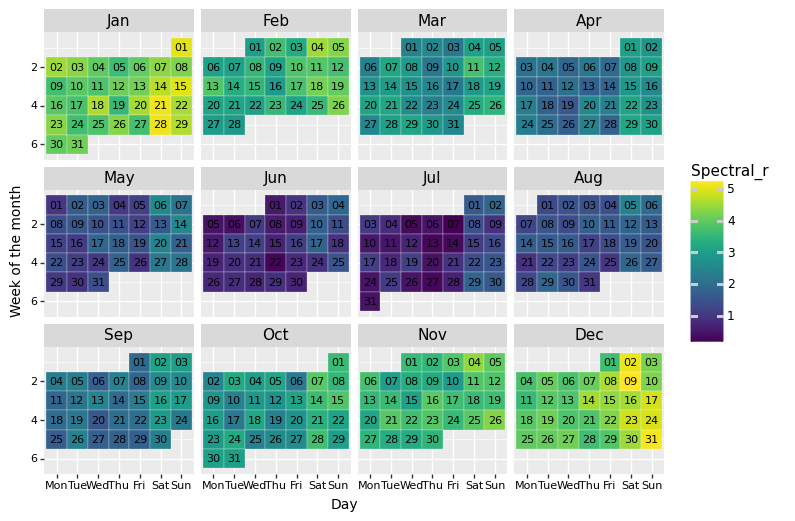

<ggplot: (116997864611)>


In [2]:
base_plot = (ggplot(df, aes('weekdayf', 'monthweek', fill='value')) +
             geom_tile(colour="white", size=0.1) +
             scale_fill_cmap(name='Spectral_r') +
             geom_text(aes(label='day'), size=8) +
             facet_wrap('~monthf', nrow=3) +
             scale_y_reverse() +
             xlab("Day") + ylab("Week of the month") +
             theme(strip_text=element_text(size=11, face="plain", color="black"),
                   axis_title=element_text(
                       size=10, face="plain", color="black"),
                   axis_text=element_text(size=8, face="plain", color="black"),
                   legend_position='right',
                   legend_background=element_blank(),
                   aspect_ratio=0.85,
                   figure_size=(8, 8),
                   dpi=100
                   ))

print(base_plot)
